In [1]:
import pandas as panda
import seaborn as sns
from datetime import datetime as dt
from dateformat import DateFormat as df

In [2]:
from matplotlib import pyplot as plt

In [6]:
dataframe=panda.read_csv("Ruter_data.csv", delimiter=";")
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


<ipython-input-4-287f858d391c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lillestrom.drop_duplicates(subset='Linjenavn', inplace=True)
/Users/imanbellemkhannate/opt/anaconda3/envs/dave3625/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kommune', ylabel='count'>

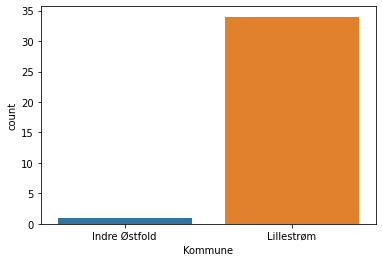

In [4]:
#Finding the number of different bus lines in Lillestrøm vs Indre Østfold

lillestrom = dataframe[(dataframe.Kommune == "Lillestrøm") | (dataframe.Kommune == "Indre Østfold")]

#Deleting dublicates of same bus lines, so we can count the number of rows to find the number of different bus lines
#Indre Østfold and Lillestrøm probably don't have the same bus lines, so this is not a problem we tried to solve
lillestrom.drop_duplicates(subset='Linjenavn', inplace=True)

sns.countplot(lillestrom['Kommune'])

<ipython-input-7-ae9d0c526d48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linje150["Dato"] = panda.to_datetime(linje150["Dato"])


<AxesSubplot:title={'center':'Antall passasjerer som går på/av busslinje 150'}, xlabel='Passasjerer_Ombord', ylabel='Dato'>

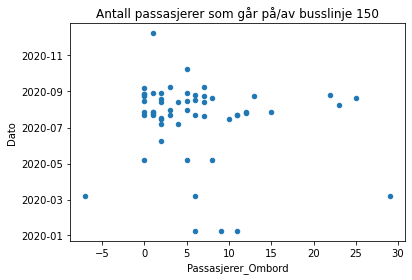

In [7]:
#Finding the number of passengers entering and leaving bus line 150 on different dates

linje150 = dataframe[(dataframe.Linjenavn == '150')&(dataframe.Linjeretning == 0)]

#Formatting the date-values, so we can list the dates in the right order
linje150["Dato"] = panda.to_datetime(linje150["Dato"])
linje150 = linje150.sort_values(by = 'Dato')

linje150.plot.scatter(x = 'Passasjerer_Ombord', y = 'Dato', title = 'Antall passasjerer som går på/av busslinje 150')

<ipython-input-8-ab67b2a903f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baerum['Ukedag'] = baerum['Dato'].apply(lambda x:panda.to_datetime(x).strftime("%A"))
<ipython-input-8-ab67b2a903f4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baerum['Ukedag'] = panda.Categorical(baerum['Ukedag'], categories=cats, ordered=True)


<AxesSubplot:xlabel='Ukedag', ylabel='Linjenavn'>

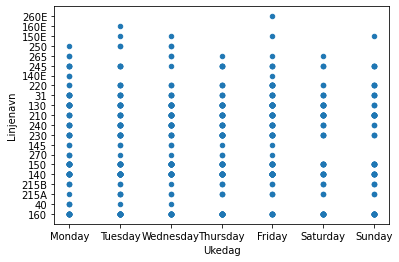

In [8]:
#Finding what buses in Bærum drives on different weekdays

baerum = dataframe[(dataframe.Kommune == 'Bærum')]

#Making a new column with weekdays
baerum['Ukedag'] = baerum['Dato'].apply(lambda x:panda.to_datetime(x).strftime("%A"))

#Changing the weekdays from numbers to names 
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
baerum['Ukedag'] = panda.Categorical(baerum['Ukedag'], categories=cats, ordered=True)

baerum = baerum.sort_values('Ukedag')

baerum.plot.scatter(x = 'Ukedag', y = 'Linjenavn')

<ipython-input-12-f0a574280ad5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linje430_og_31.drop_duplicates(subset = ['Holdeplass_Fra'], inplace = True)


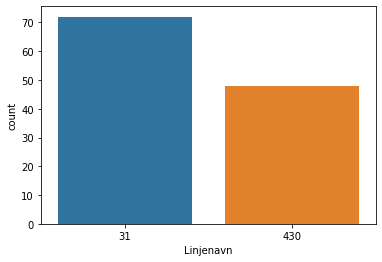

In [12]:
#Finding number of bus stops for bus line 430 and 31

linje430_og_31 = dataframe[(dataframe.Linjenavn == '430') | (dataframe.Linjenavn == '31')]

#Deleting duplicates
linje430_og_31.drop_duplicates(subset = ['Holdeplass_Fra'], inplace = True)

ax = sns.countplot(x = "Linjenavn", data = linje430_og_31)

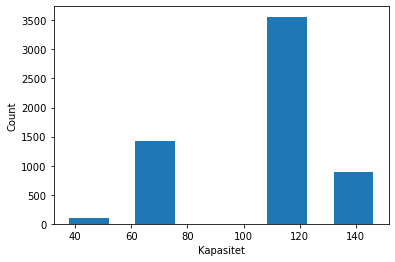

In [13]:
#Histogram showing how many buses of each capacity 

plt.hist(dataframe.Kjøretøy_Kapasitet, bins=5, rwidth=0.6)
plt.xlabel('Kapasitet')
plt.ylabel('Count')
plt.show()